### Main Goal:
`Predict the outcome `

0 : `no diabetes`

1 : `diabetes`

![](https://media.giphy.com/media/26u6c4ygFTf27qUz6/giphy.gif)

In [1]:
# Librarys
import pandas as pd#for data analysis / manipulation 
import seaborn as sns#another ploting library on the basis of matplotlib
import matplotlib.pyplot as plt#for ploting
import missingno#for missing values
import numpy as np#for numerical computation
import itertools
plt.style.use('ggplot')#matplotlib ploting styles
%matplotlib inline
import warnings
warnings.simplefilter("ignore")# use to ignore all the warnings

In [2]:
#reading data
df = pd.read_csv("diabetes.csv")

In [3]:
# first five grows of Dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.columns# all the columns in the data 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
#checking null values, if exist than we have to deal with them 
#to create accurate models
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


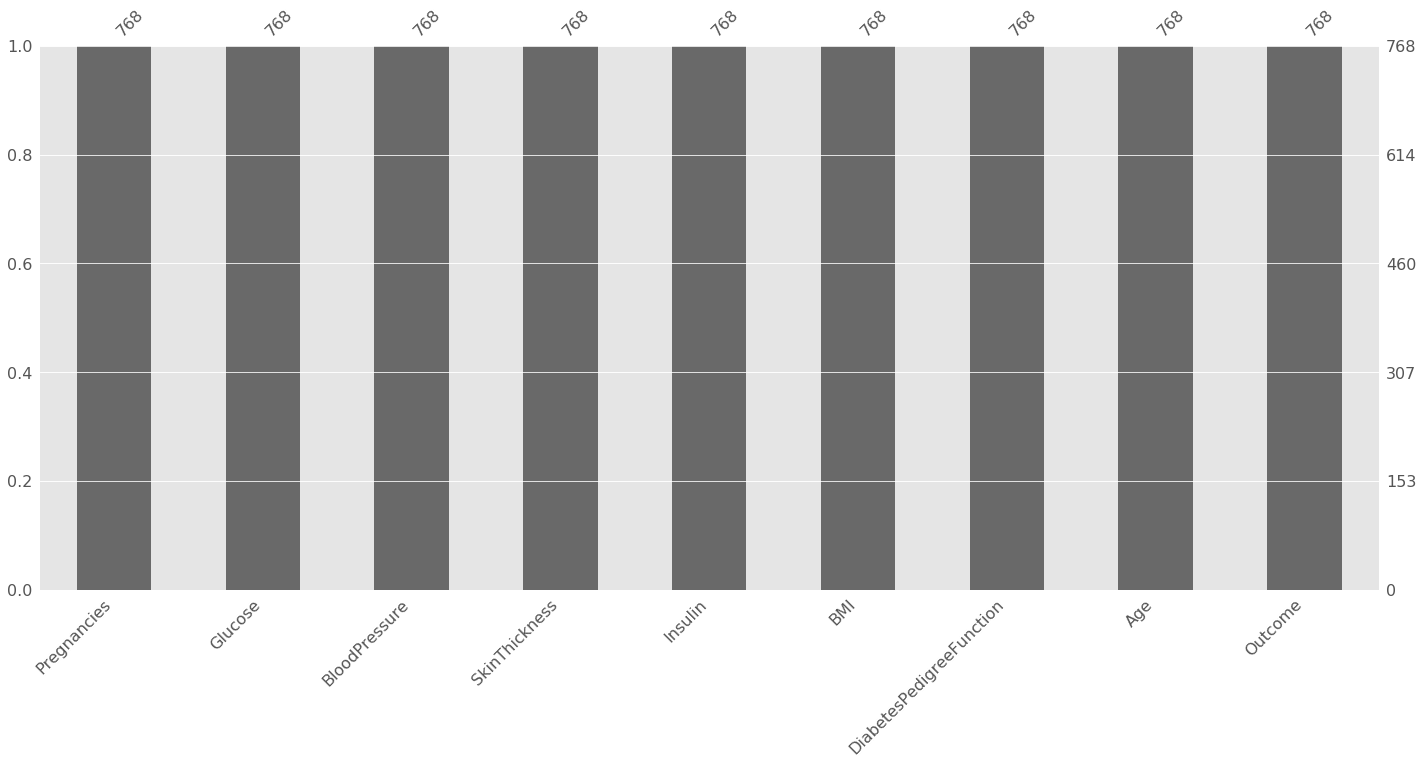

In [6]:
missingno.bar(df);#their are no missing values if any white lines are there,
#it represent missing values

0    500
1    268
Name: Outcome, dtype: int64


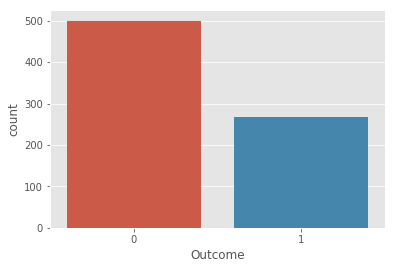

In [7]:
print(df.Outcome.value_counts())
sns.countplot(x = "Outcome",data=df);
# 1 for positive and 0 for -ve 

> `Utility function for plotting the relationships between features and target variables in    the form of plots`

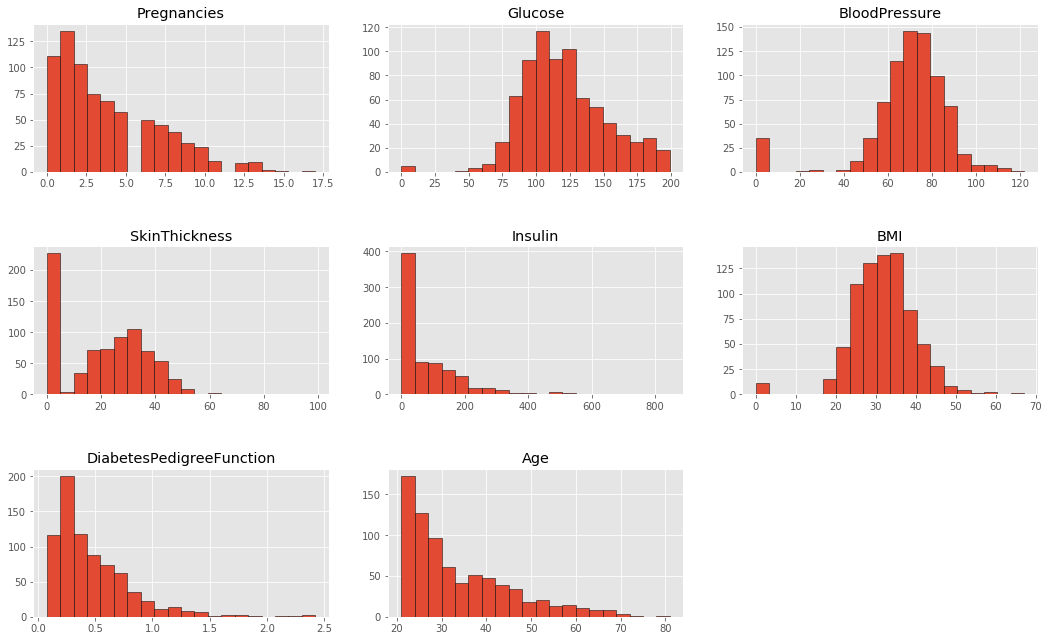

In [8]:
columns=df.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

`pairplot to see the distribution of the features in the dataset on the basis of diabetes`

In [38]:
diab1=df[df['Outcome']==1]
columns=df.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

> `pairplot to see the distribution of the features in the dataset on the basis of who don't have diabetes`

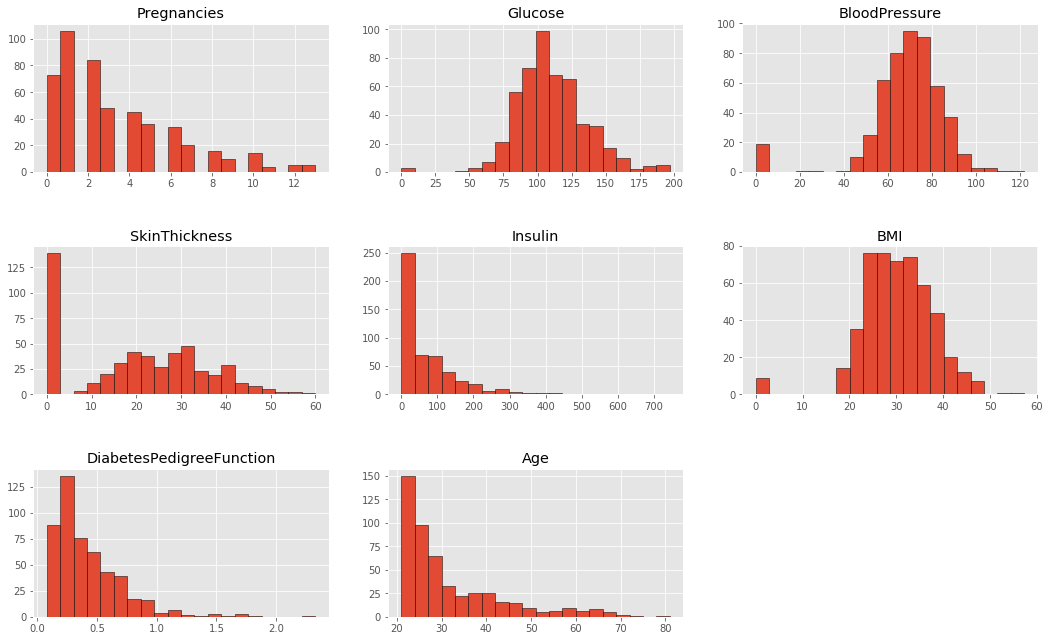

In [9]:
diab1=df[df['Outcome']==0]
columns=df.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

> ` pairplot to see the distribution of the features in the dataset`

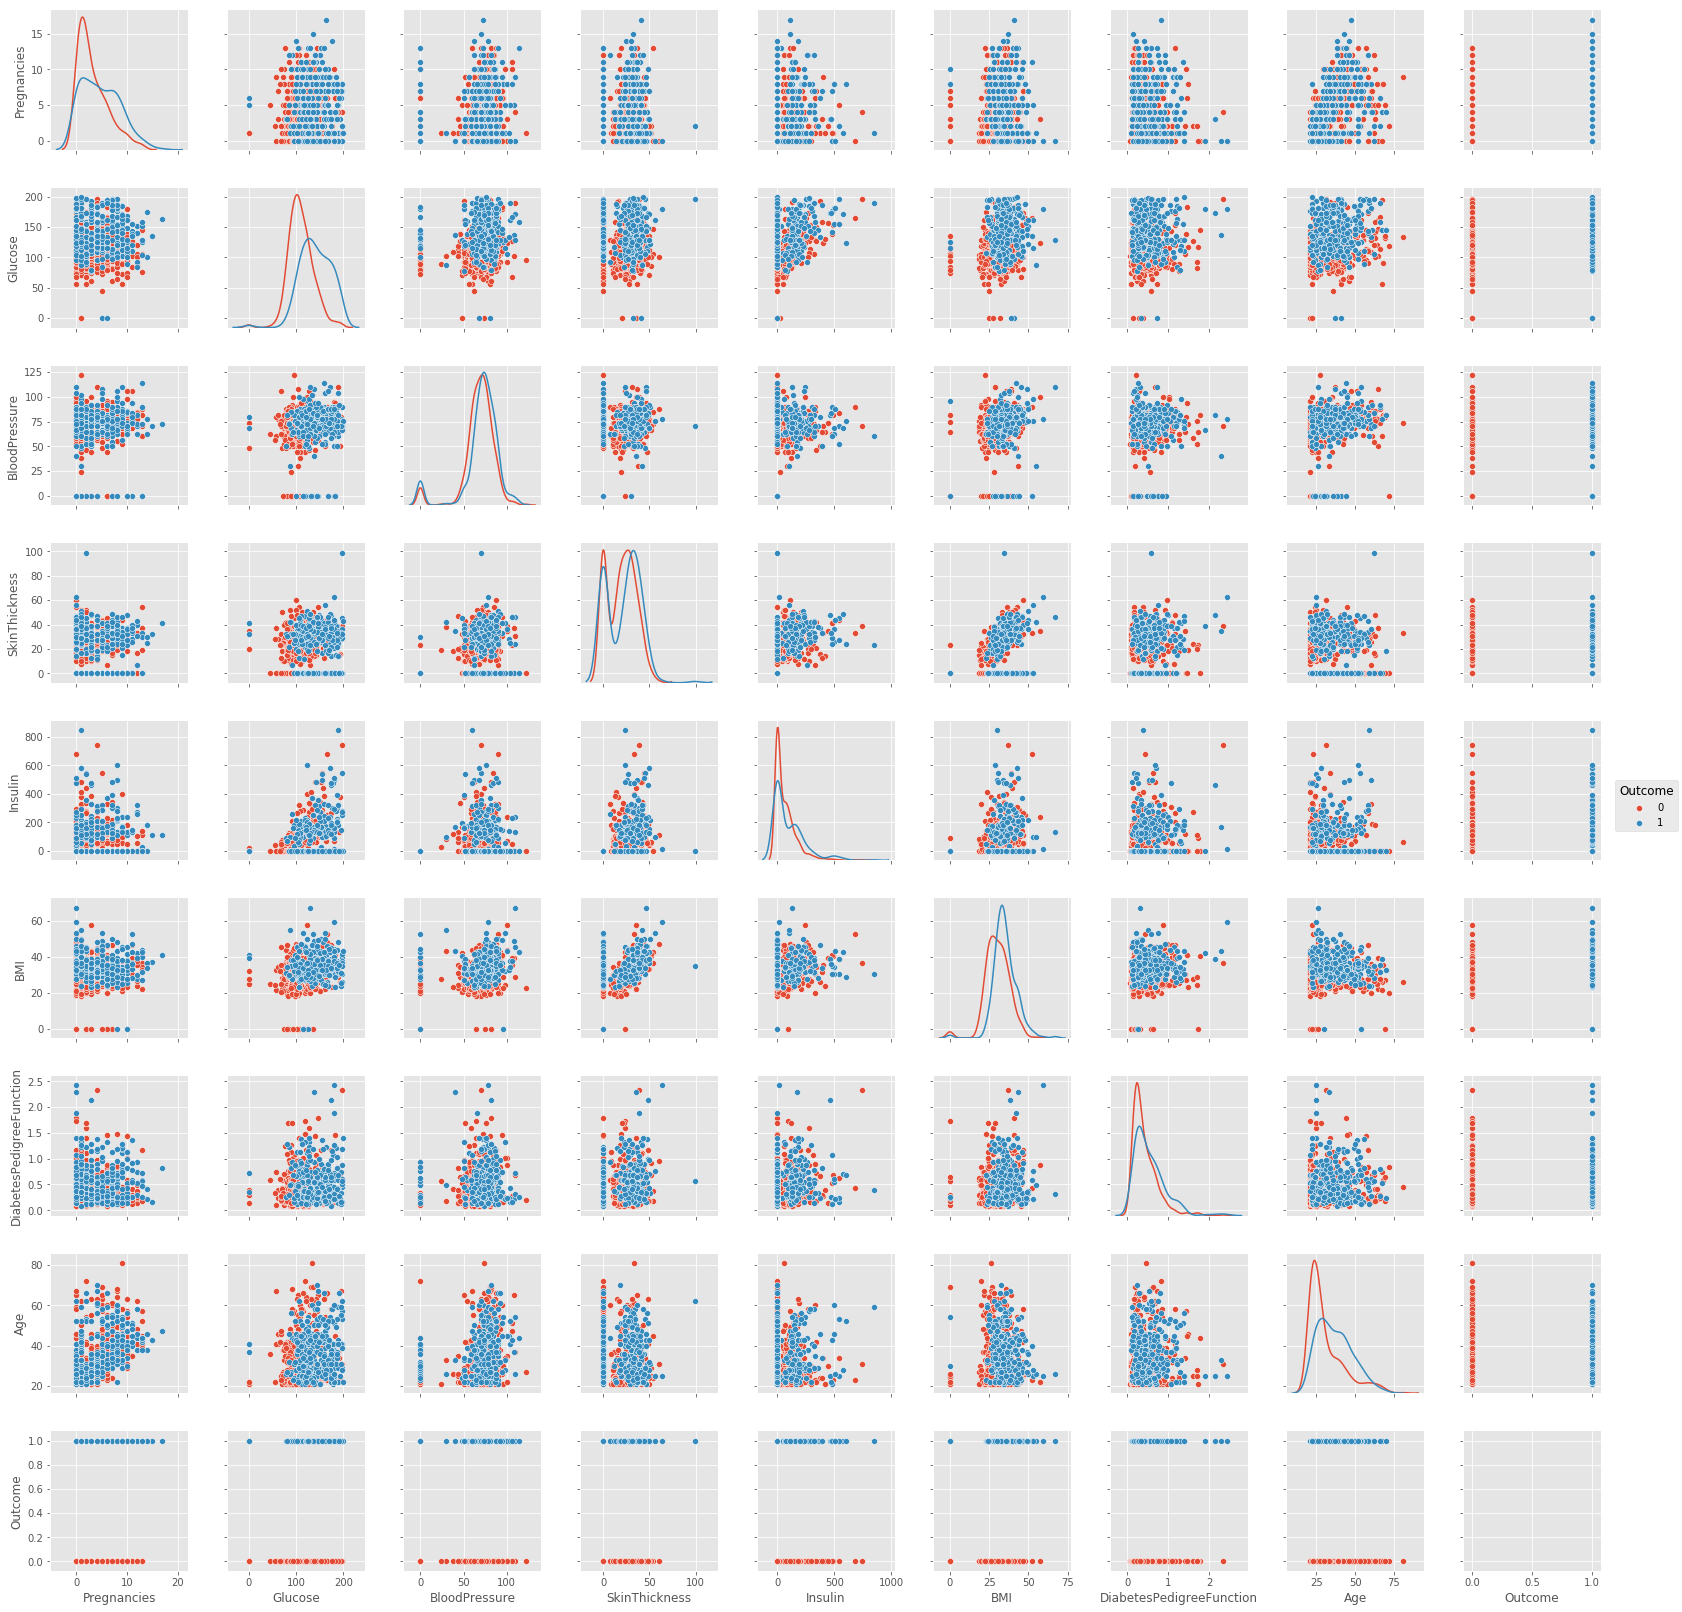

In [10]:
sns.pairplot(df,hue='Outcome',diag_kind='kde')
plt.show()

# Creating a prediction model

## BASIC MODELS

### 1. linear Regression

![](https://rajputhimanshu.files.wordpress.com/2018/03/linear_vs_logistic_regression.jpg)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [13]:
lr = LinearRegression()#creating instance of the linear regression class

In [14]:
train = df.iloc[:,:8]#train data

In [15]:
test = df.iloc[:,-1]#test data

> `spliting the data into test and train`

In [16]:
x_train,x_test,y_train,y_test = train_test_split(train,test,test_size=0.3, random_state=42)

`Fitting the data into the algorithum so it can learn from it`

In [17]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
pre = lr.predict(x_test)#predection on the test data

`y = mx + c`

In [21]:
lr.intercept_#it c in the equations

-1.0013847024966276

In [22]:
lr.coef_ #its m in the equations

array([ 0.00899394,  0.00574161, -0.00171114, -0.00025321, -0.0001265 ,
        0.01617347,  0.07290169,  0.0062645 ])

In [23]:
# calculate MAE using scikit-learn
metrics.mean_absolute_error(y_test, pre)

0.3534282433442794

In [24]:
#calculiting the mean squared error
metrics.mean_squared_error(y_test, pre)

0.17603335005142035

In [25]:
# calculate RMSE using scikit-learn
np.sqrt(metrics.mean_squared_error(y_test, pre))

0.41956328491828304

### 2. logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_predict

In [40]:
LR = LogisticRegression()#creating instance of the logistic regression class
LR.fit(x_train,y_train)#fitting the data so that elgo can learn from it
pre=LR.predict(x_test)#predicting the data

In [35]:
metrics.accuracy_score(pre,y_test)#we are almost 76% accurate

0.7575757575757576

### 3. Random forest

![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526467744/voting_dnjweq.jpg)

In [37]:
import os
from sklearn.tree import DecisionTreeClassifier#represent random forest classifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [38]:
DR = DecisionTreeClassifier(random_state=4561)
#creating instance of the Decision tree class

In [39]:
predicted = cross_val_score(DR, train, test, cv=10)
DR.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=4561,
            splitter='best')

In [113]:
# DR.score(x_test,y_test)
#if you want to create a decision tree in the image format
export_graphviz(DR,feature_names=train.columns,filled=True,rounded=True)
os.system('dot -Tpng tree.dot -o tree.png')

0

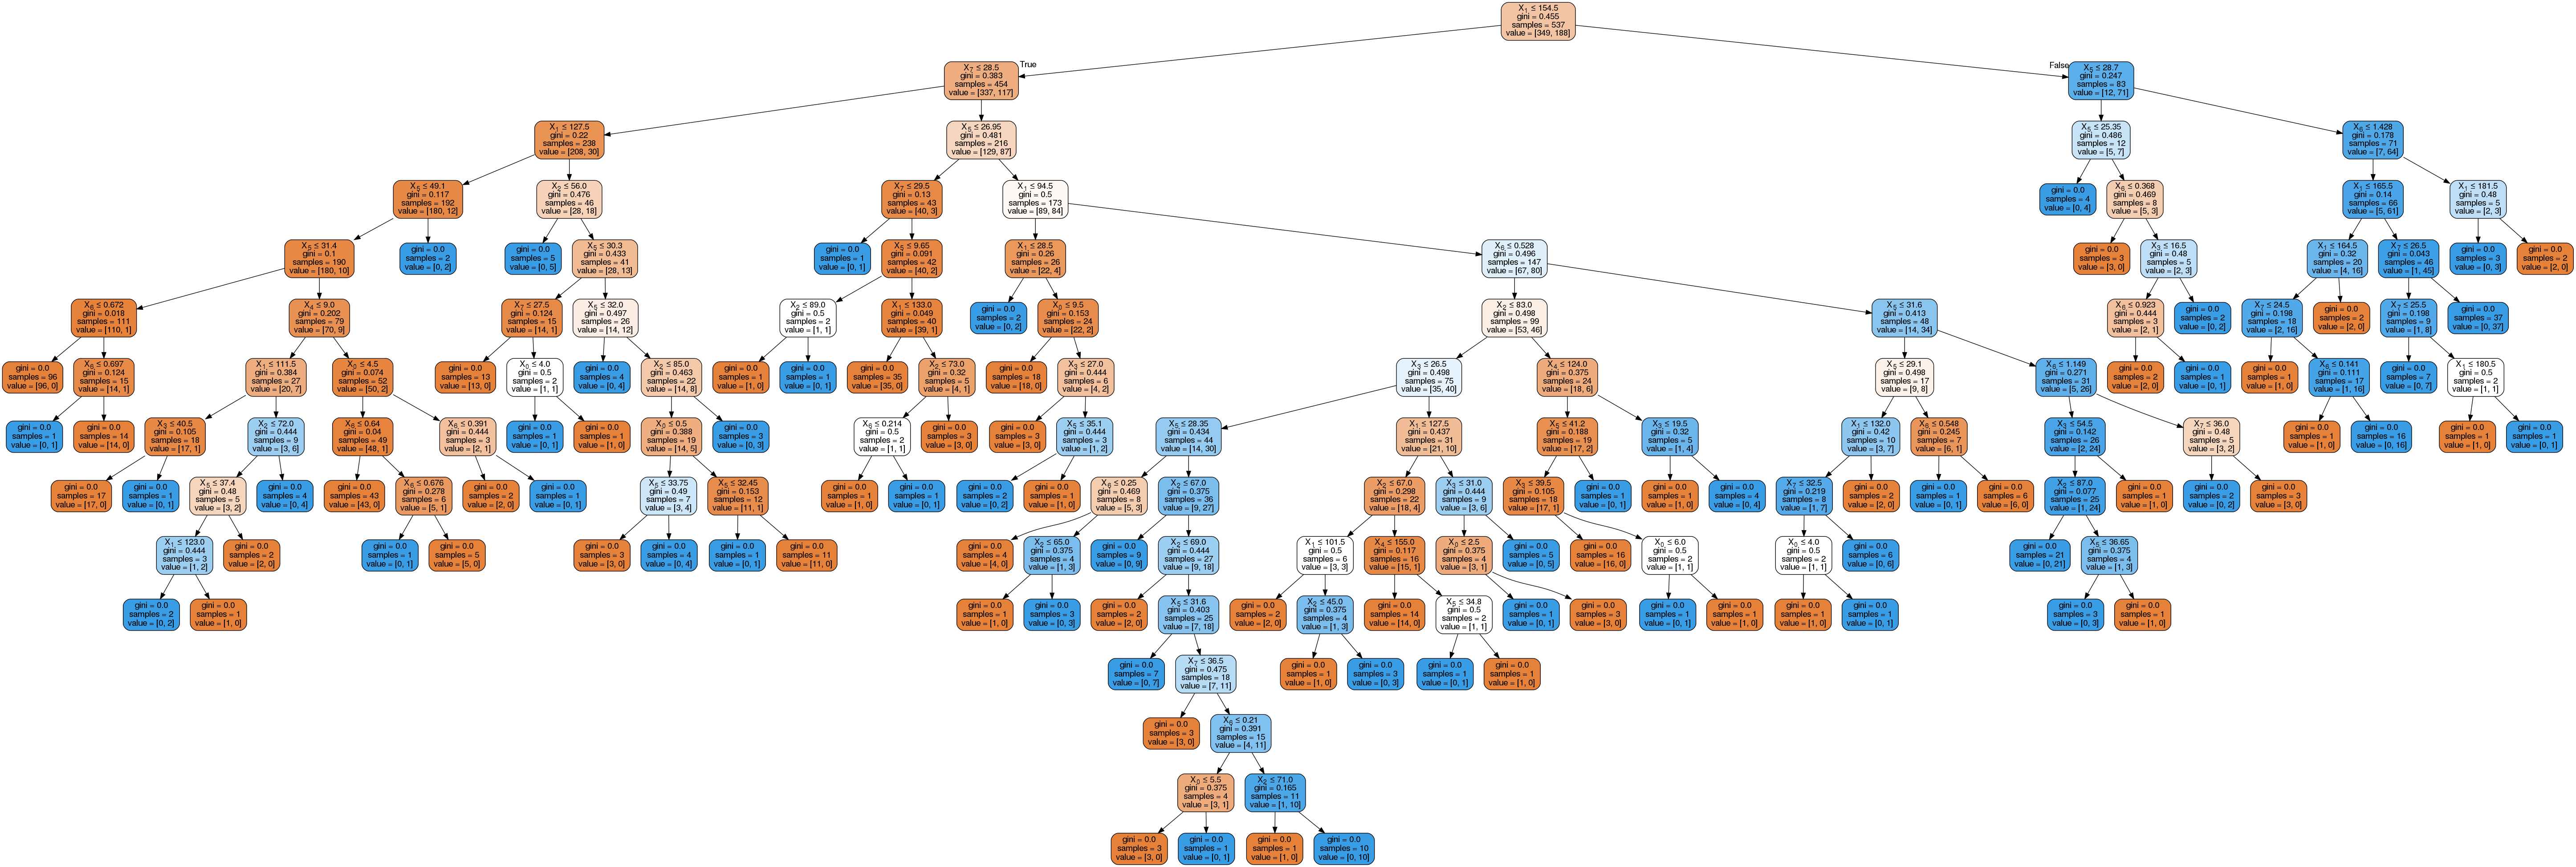

In [114]:
#graphicaly representing graph
dot_data = StringIO()
export_graphviz(DR, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())